In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import random

In [28]:
def paired_t_test(sample1, sample2, tail, alpha):
    n = len(sample1) #both sample are of same size
    d = [x - y for x, y in zip(sample1, sample2)]
    d_mean = np.mean(d)
    d_std = np.std(d, ddof = 1)
    t = d_mean/(d_std/n**0.5)
    df = n - 1

    area = alpha/2 if tail == 'two' else alpha
    critical = abs(stats.t.ppf(area, df))
    
    print("Critical Value =",critical)
    print("T Statistic =",t)
    if abs(t) > abs(critical):
        print("Reject Null Hypothesis")
    else:
        print("Accept Null Hypothesis")

    x = np.linspace(-4, 4, 1000)
    y = stats.t.pdf(x, df)

    plt.figure(figsize = (10, 6))
    plt.plot(x, y, color = 'blue', label = 'T Distribution Curve')
    plt.axvline(t, color = 'green', linestyle = '--', label = 'T Statistic')
    
    if tail == 'left':where = x < -critical
    elif tail == 'right':where = x > critical
    else:where = abs(x) > critical
        
    plt.fill_between(x, y, where = where, color = 'red', alpha = 0.5, label = 'Critical Region')
    plt.xlabel('T Score')
    plt.ylabel('Probability Distribution')
    plt.title('Paired T Test')
    plt.legend()
    plt.show()

<b>An IQ test was conducted on to 5 persons, before and after they are trained.
Test whether there is any change in IQ after the training</b>

In [6]:
df = pd.read_csv('iq_test.csv')
df.head()

,Candidate,IQ Before,IQ After
0,I,110,120
1,II,120,118
2,III,123,125
3,IV,132,136
4,V,125,121


Critical Value = 2.13184678632665
T Statistic = -0.8164965809277261
Accept Null Hypothesis


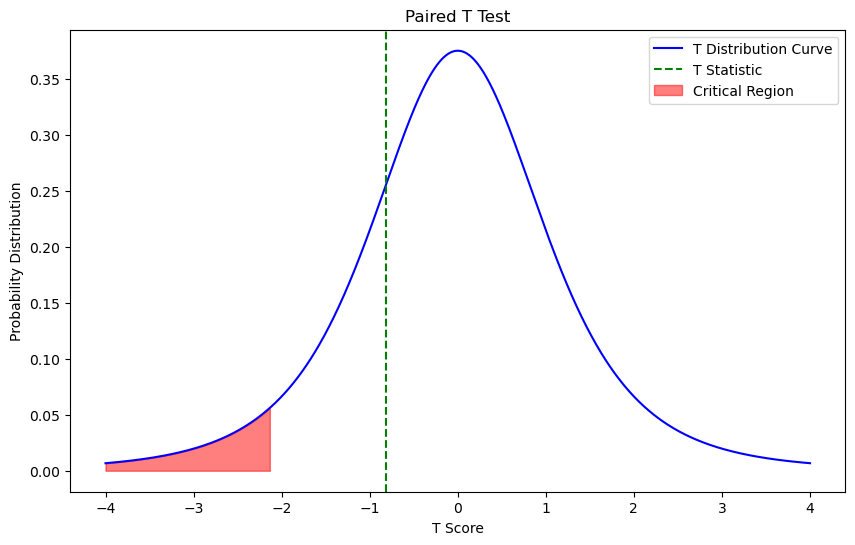

Critical Value = 2.7764451051977996
T Statistic = -0.8164965809277261
Accept Null Hypothesis


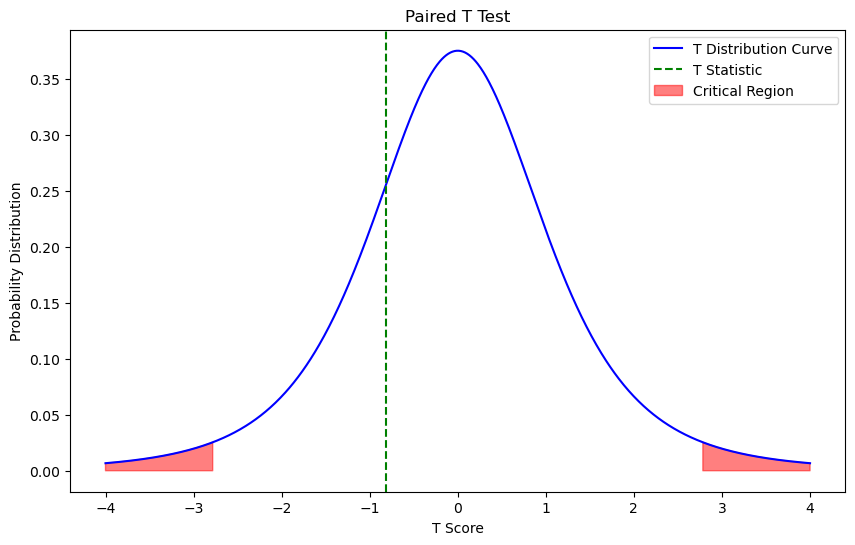

Critical Value = 2.13184678632665
T Statistic = -0.8164965809277261
Accept Null Hypothesis


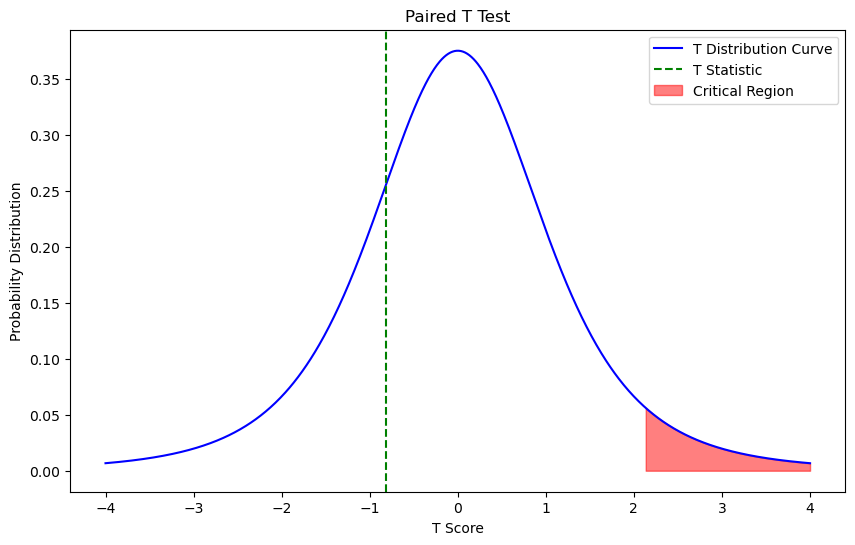

In [29]:
before = df['IQ Before'].to_list()
after = df['IQ After'].to_list()
alpha = 0.05
paired_t_test(before, after, 'left', alpha)
paired_t_test(before, after, 'two', alpha)
paired_t_test(before, after, 'right', alpha)